<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-and-work-on-level-3-Pikachu-Image." data-toc-modified-id="Load-and-work-on-level-3-Pikachu-Image.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load and work on level 3 Pikachu Image.</a></span></li></ul></div>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import numpy as np
from scipy import stats

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,8]

In [3]:
path = "img/pikachu_board_5.png"

## Load and work on level 3 Pikachu Image.

Load image and turn it to grayscale.

In [4]:
img = cv2.imread(path)

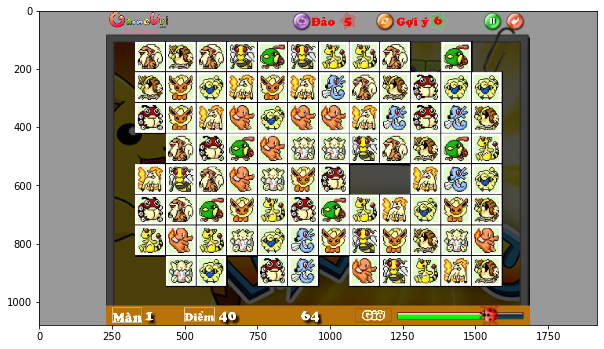

In [5]:
plt.imshow(img[:,:,::-1])

In [6]:
width = img.shape[0]
height = img.shape[1]
print(width, height)

1080 1920


In [7]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

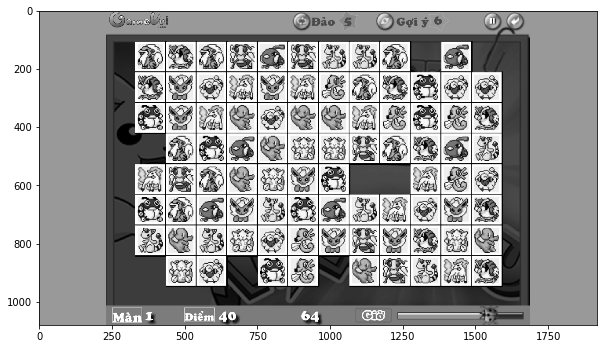

In [8]:
plt.imshow(gray_img, cmap = "gray")

Edge detection

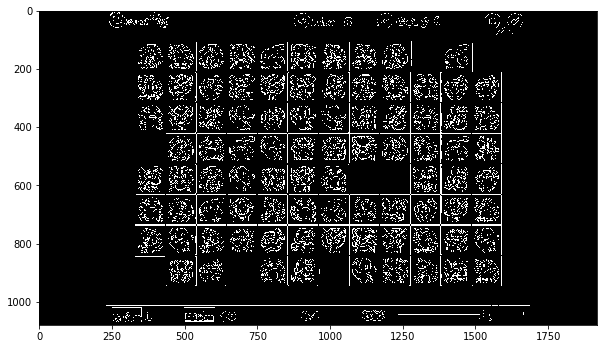

In [9]:
edges_img = cv2.Canny(gray_img, 200, 240, 30)
plt.imshow(edges_img, cmap='gray')

In [10]:
copy = img.copy()
linesP = cv2.HoughLinesP(edges_img, 1, np.pi/180, int(250 * img.shape[0]/329), None, int(50 * img.shape[0]/329), 15)

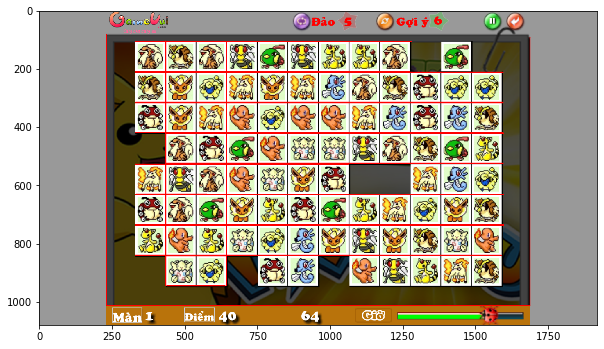

In [11]:
for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(copy, (l[0], l[1]), (l[2], l[3]), (0,0,255), 2, cv2.LINE_AA)

    plt.imshow(copy[...,::-1])

[ 331  737 1597  737]


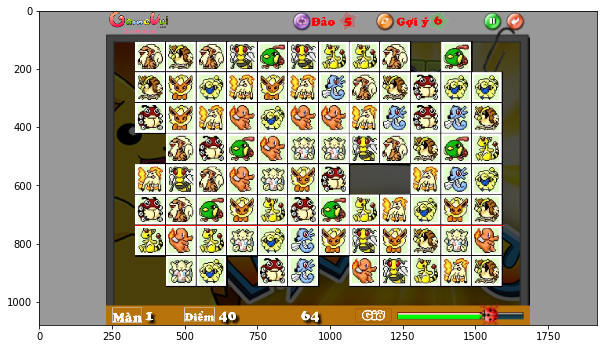

In [12]:
l = linesP[2][0]
print(l)
copy2 = img.copy()
cv2.line(copy2, (l[0], l[1]), (l[2], l[3]), (0,0,255), 2, cv2.LINE_AA)
plt.imshow(copy2[...,::-1])

In [13]:
linesP.shape

(21, 1, 4)

In [14]:
horizontal_lines = []
vertical_lines = []

In [15]:
for i in range(0, len(linesP)):
    l = linesP[i][0]
    if (l[0] == l[2]):
        vertical_lines.append(l)
    elif (l[1] == l[3]):
        horizontal_lines.append(l);

In [16]:
print(f"Number of horizontal lines: {len(horizontal_lines)}")
print(f"Number of vertical lines: {len(vertical_lines)}")

Number of horizontal lines: 17
Number of vertical lines: 4


We see that all lines are either horizontal or vertical.

Now we will sort horizontal lines list and vertical lines list to create some order.

In [17]:
def hori(l):
    return l[1]
horizontal_lines.sort(key = hori)

In [18]:
def verti(l):
    return l[0]
vertical_lines.sort(key = verti)

In [19]:
def is_identical(line1, line2):
    for i in range(4):
        if abs(line1[i] - line2[i]) > 8:
            return False
    return True

In [20]:
# Get rid of duplicate lines and noises
gap_width = np.inf
x1_values = []
x2_values = []
tmp = horizontal_lines.copy()
horizontal_lines = []
for line in tmp:
    for eps in range(-4, 5):
        x1_values.append(line[0] + eps)
        x2_values.append(line[2] + eps)
    
for line in tmp:
    flag1 = False
    flag2 = False
    for eps in range(-4, 5):
        if line[0] + eps == stats.mode(x1_values)[0]:
            flag1 = True
    for eps in range(-4, 5):
        if line[2] + eps == stats.mode(x2_values)[0]:
            flag2 = True
    if flag1 and flag2:
        if len(horizontal_lines) == 0 or not is_identical(line, horizontal_lines[-1]):
            horizontal_lines.append(line)
        else:
            gap_width = min(gap_width, line[1] - horizontal_lines[-1][1])
            
horizontal_lines

[array([ 331,  210, 1597,  210], dtype=int32),
 array([ 332,  313, 1597,  313], dtype=int32),
 array([ 331,  418, 1597,  418], dtype=int32),
 array([ 333,  631, 1597,  631], dtype=int32),
 array([ 331,  734, 1597,  734], dtype=int32),
 array([ 331,  839, 1591,  839], dtype=int32)]

In [21]:
# Get rid of duplicate lines and noises
y1_values = []
y2_values = []
tmp = vertical_lines.copy()
vertical_lines = []
for line in tmp:
    for eps in range(-4, 5):
        y1_values.append(line[1] + eps)
        y2_values.append(line[3] + eps)
    
for line in tmp:
    flag1 = False
    flag2 = False
    for eps in range(-4, 5):
        if line[1] + eps == stats.mode(y1_values)[0]:
            flag1 = True
    for eps in range(-4, 5):
        if line[3] + eps == stats.mode(y2_values)[0]:
            flag2 = True
    if flag1 and flag2:
        if len(vertical_lines) == 0 or not is_identical(line, vertical_lines[-1]):
            vertical_lines.append(line)
        else:
            gap_width = min(gap_width, line[0] - vertical_lines[-1][0])
            
if gap_width == np.inf:
    gap_width = 0
vertical_lines

[array([436, 944, 436, 102], dtype=int32),
 array([644, 944, 644, 106], dtype=int32)]

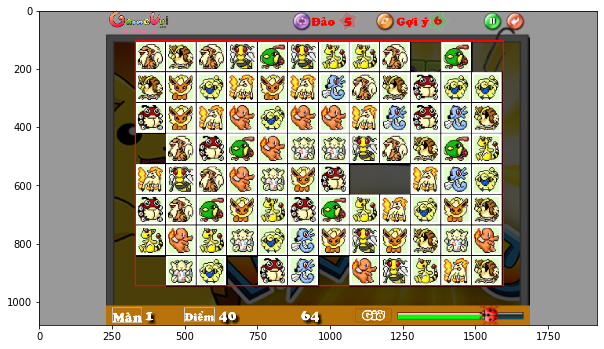

In [22]:
# Find bounding box
topleft = [horizontal_lines[0][0], vertical_lines[0][3]]
bottomright = [horizontal_lines[0][2], vertical_lines[0][1]]
topmost_line = [topleft[0], topleft[1], bottomright[0], topleft[1]]
leftmost_line = [topleft[0], bottomright[1], topleft[0], topleft[1]]
bottommost_line = [topleft[0], bottomright[1], bottomright[0], bottomright[1]]
rightmost_line = [bottomright[0], bottomright[1], bottomright[0], topleft[1]]

copy = img.copy()
l = topmost_line
cv2.line(copy, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
l = leftmost_line
cv2.line(copy, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
l = bottommost_line
cv2.line(copy, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
l = rightmost_line
cv2.line(copy, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

plt.imshow(copy[...,::-1])

In [23]:
if not is_identical(topmost_line, horizontal_lines[0]):
    horizontal_lines = [topmost_line] + horizontal_lines
    
if not is_identical(bottommost_line, horizontal_lines[-1]):
    horizontal_lines = horizontal_lines + [bottommost_line]
    
if not is_identical(leftmost_line, vertical_lines[0]):
    vertical_lines = [leftmost_line] + vertical_lines
    
if not is_identical(rightmost_line, vertical_lines[-1]):
    vertical_lines = vertical_lines + [rightmost_line]
    
deltas = []
for i in range(0, len(horizontal_lines)):
    for j in range(i + 1, len(horizontal_lines)):
        if j < len(horizontal_lines) - 1:
            deltas.append(horizontal_lines[j][1] - horizontal_lines[i][1])
        else:
            deltas.append(horizontal_lines[j][1] - horizontal_lines[i][1] + gap_width)
        
for i in range(0, len(vertical_lines)):
    for j in range(i + 1, len(vertical_lines)):
        if j < len(vertical_lines) - 1:
            deltas.append(vertical_lines[j][1] - vertical_lines[i][1])
        else:
            deltas.append(vertical_lines[j][1] - vertical_lines[i][1] + gap_width)

In [24]:
def is_int(value):
    return abs(value - round(value)) < 0.15

In [25]:
# Find the shape of the gameboard
for uss in range(bottomright[1] - topleft[1], 1, -1):
    flag = True
    for delta in deltas:
        if not is_int(delta / uss):
            flag = False
            break
    if flag:
        unit_square_size = uss
        break
        
print(unit_square_size)
width = round((bottomright[0] - topleft[0]) / unit_square_size)
height = round((bottomright[1] - topleft[1]) / unit_square_size)
unit_square_width = (bottomright[0] - topleft[0] - gap_width * (width - 1)) / width
unit_square_height = (bottomright[1] - topleft[1] - gap_width * (height - 1)) / height
print(width, height)

107
12 8


In [26]:
pokemons = []
for index in range(height):
    pokemon = []
    for jndex in range(width):
        topleft_pokemon = (int(topleft[0] + (unit_square_width + gap_width) * jndex),
                           int(topleft[1] + (unit_square_height + gap_width) * index))
        bottomright_pokemon = (int(topleft_pokemon[0] + unit_square_width),
                               int(topleft_pokemon[1] + unit_square_height))
        pokemon.append((topleft_pokemon, bottomright_pokemon))
    pokemons.append(pokemon)

print(f"row: {len(pokemons)}, col: {len(pokemons[0])}")

row: 8, col: 12


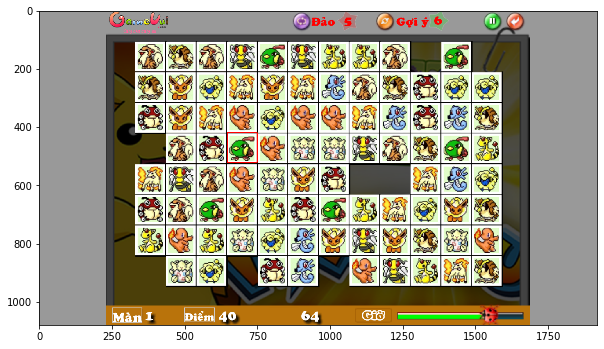

In [27]:
point_1 = pokemons[3][3][0]
point_2 = pokemons[3][3][1]
copy2 = img.copy()
cv2.rectangle(copy2, point_1, point_2, (0,0,255), 2, cv2.LINE_AA)
plt.imshow(copy2[...,::-1])


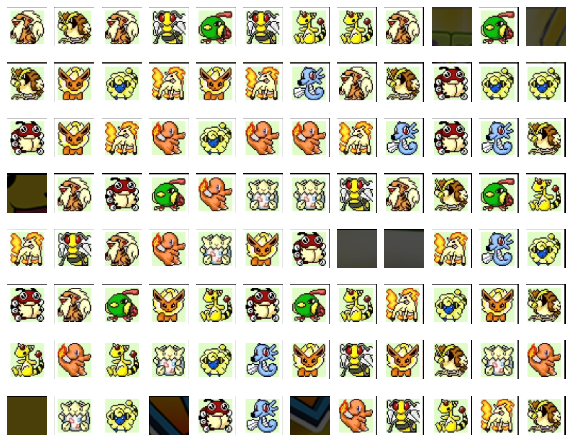

In [28]:
fig, ax = plt.subplots(height, width)
plt.rcParams['figure.figsize'] = [12,8]
for index in range(height):
    for jndex in range(width):
        topleft_pokemon, bottomright_pokemon = pokemons[index][jndex][0],  pokemons[index][jndex][1]
        temp_img = img[topleft_pokemon[1]:bottomright_pokemon[1], topleft_pokemon[0]:bottomright_pokemon[0]]
        ax[index][jndex].axis('off')
        ax[index][jndex].imshow(temp_img[:,:,::-1])